# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [367]:
# Impoting Important Libraries

import pandas as pd # to bring data analysis tools and libraries
import numpy as np # To perform numerical/mathematical operation on array
import matplotlib.pyplot as plt # For plotting data
%matplotlib inline 
import seaborn as sns # for statistical graphics
import datetime #supplies classes to work with date and time

## Let's begin with loading our dataset and naming it as 'df'

In [368]:
# Loading Bike Sharing Data

df = pd.read_csv(r'C:\Users\rankiz\Desktop\Alma Better\Capstone Project\ML-Supervised Learning Regression\Bike Sharing Demand Prediction\SeoulBikeData.csv')

## Now that data has been loaded, let's take a look at our data and it's attributes.

In [369]:
# Checking size of the data
df.shape

(8760, 14)

In [370]:
# Displaying top 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [371]:
# Displaying Bottom 5 Rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [372]:
# Taking a look at our variables
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [373]:
# Displaying Data Set Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [374]:
# Checking description for numerical variables
df.describe()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## We have done an overview of our data. 
1) We have got 14 features and  8760 rows.
2) 'Rented Bike Count' is our dependent variable.
3) There are no null values in any of the column. Phewww !!
4) Out of 14 Variables - 4 Variables are of Object Dtype , while 10 are of numerical Dtype.

## Let's make data ready for the analysation part.

In [375]:
# Checking for duplicates
check_dupl = df.duplicated(keep = False).any()
print(check_dupl)

False


There are no duplicate rows. We have an object type variable "Date" which represent dates. Let's do some feature engineering so that we can make good use of this date data.

In [376]:
# Let's check how many years data is taken
print(pd.to_datetime(df['Date']).dt.year.unique())


[2017 2018]


Two Years data - 2017 & 2018 is considered. Let us check, what months are considered

In [377]:
# Let's check how many months data is taken
print(pd.to_datetime(df['Date']).dt.month.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [378]:
# Let's check how many day data is taken
print(pd.to_datetime(df['Date']).dt.day.unique())

[12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31  1  2  3  4
  5  6  7  8  9 10 11]


In [379]:
# Extracting Weekdays/Weekends from Date Column
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekday_weekend']= df['day_of_week'].apply(lambda x : 1 if x == 'Saturday' or x == 'Sunday' else 0)

In [380]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_of_week,weekday_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


In [425]:
df[df['Date'] == '2018-01-05']

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_of_week,weekday_weekend
3624,2018-01-05,782,0,18.3,78,0.8,349,14.3,0.00,0.0,0.0,Spring,Holiday,Yes,1,Friday,0
3625,2018-01-05,705,1,18.3,83,1.1,451,15.3,0.00,0.0,0.0,Spring,Holiday,Yes,1,Friday,0
3626,2018-01-05,534,2,18.2,85,0.8,355,15.6,0.00,0.0,0.0,Spring,Holiday,Yes,1,Friday,0
3627,2018-01-05,343,3,18.1,85,1.0,284,15.5,0.00,0.0,0.0,Spring,Holiday,Yes,1,Friday,0
3628,2018-01-05,187,4,18.0,85,0.3,275,15.4,0.00,0.0,0.0,Spring,Holiday,Yes,1,Friday,0
3629,2018-01-05,166,5,18.0,85,0.8,346,15.4,0.00,0.0,0.0,Spring,Holiday,Yes,1,Friday,0
3630,2018-01-05,306,6,17.8,85,0.6,265,15.2,0.00,0.0,0.0,Spring,Holiday,Yes,1,Friday,0
3631,2018-01-05,614,7,18.0,82,0.7,264,14.8,0.11,0.0,0.0,Spring,Holiday,Yes,1,Friday,0
3632,2018-01-05,1067,8,18.8,76,0.6,301,14.4,0.36,0.0,0.0,Spring,Holiday,Yes,1,Friday,0
3633,2018-01-05,1024,9,20.7,67,1.1,464,14.3,1.30,0.0,0.0,Spring,Holiday,Yes,1,Friday,0


We have extracted months,type of day and weekdays from the Date Column , which will be useful in our EDA. So let's just drop 'Date' column.

In [279]:
# Let's drop 'Date' column
df = df.drop(['Date'],axis=1)
df = df.drop(['day_of_week'],axis =1)

C:\Users\rankiz\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

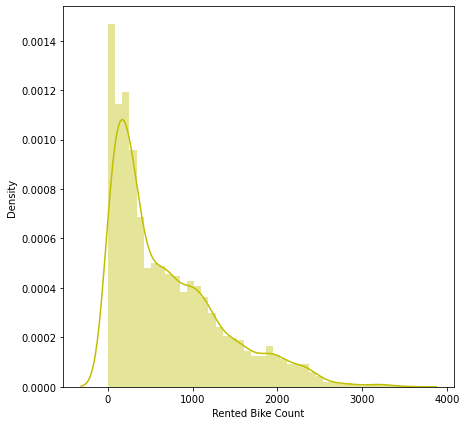

In [232]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="y")

In [233]:
# Performing EDA

# Seperating numerical feature
num_feature = df.iloc[:,1:11]

In [234]:
num_feature.head()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [235]:
num_feature = num_feature.loc[:, num_feature.columns != 'Hour',]

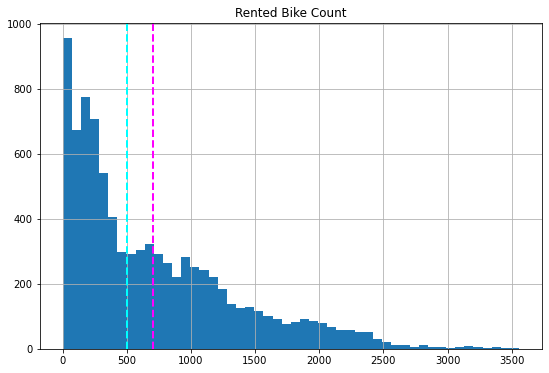

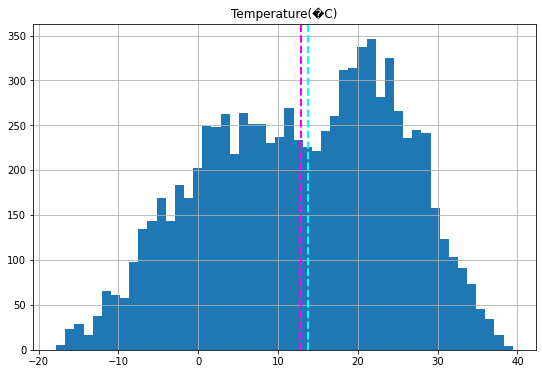

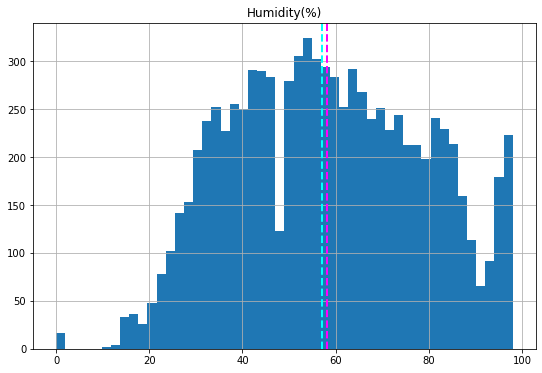

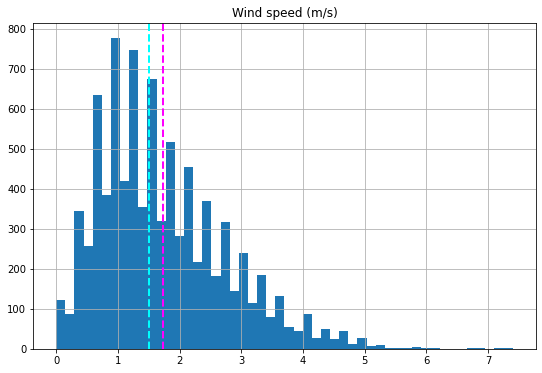

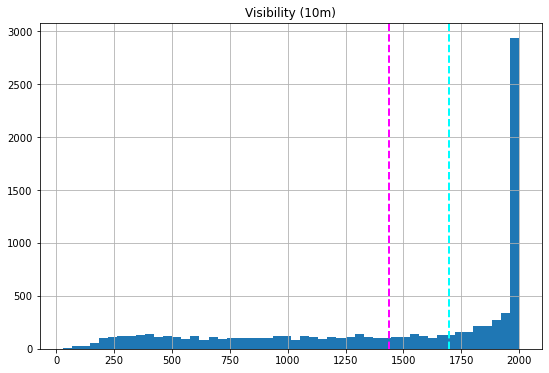

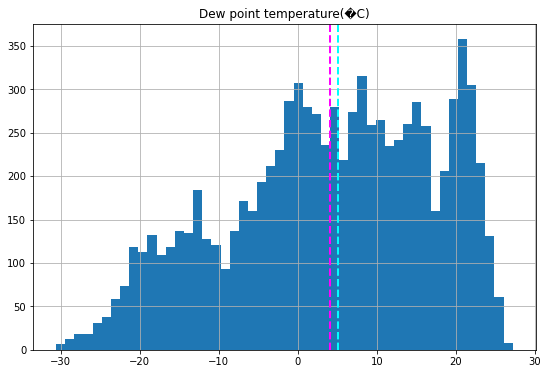

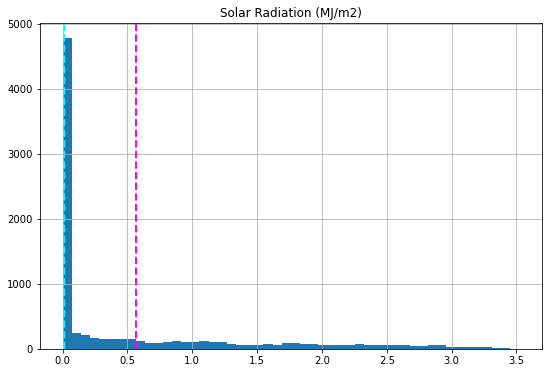

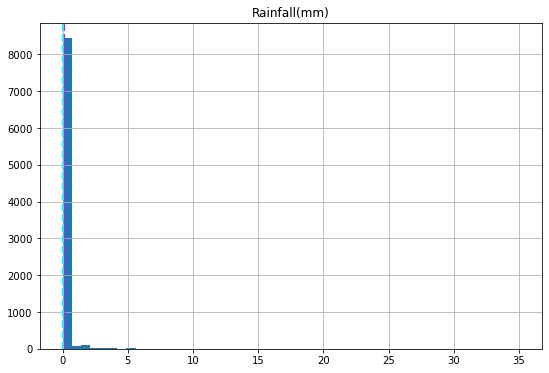

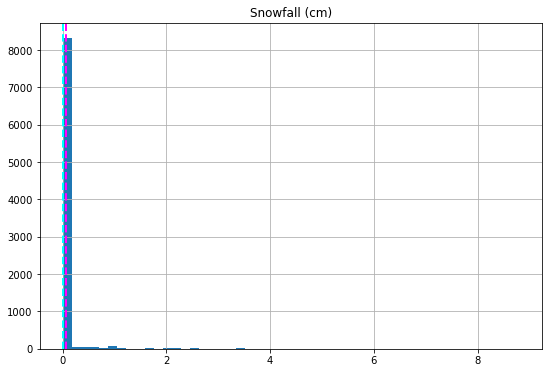

In [236]:
# Plotting Count of each variable

for col in num_feature:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

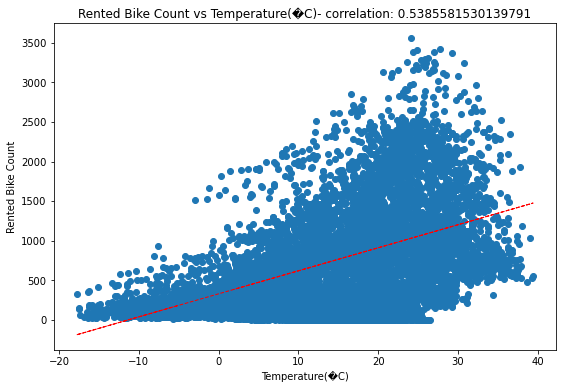

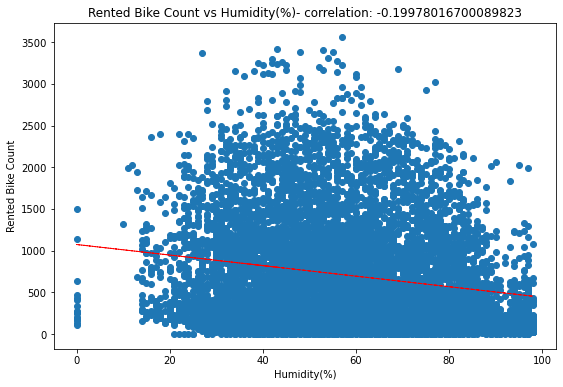

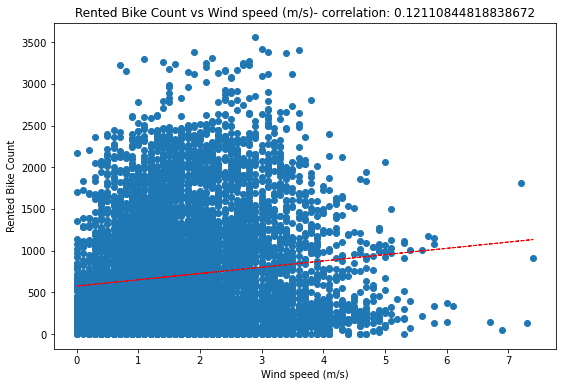

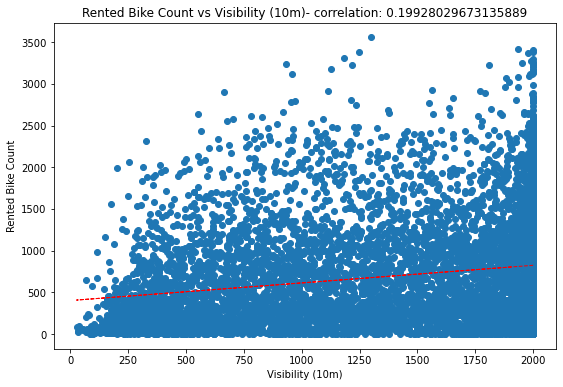

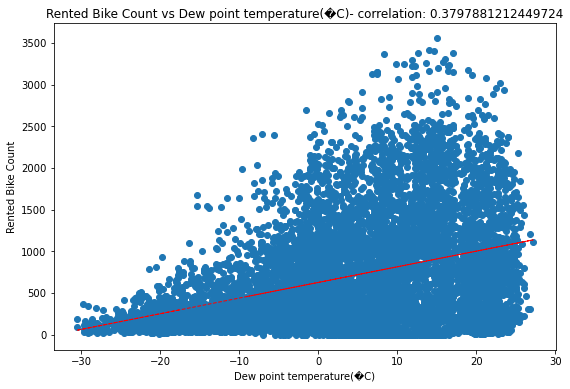

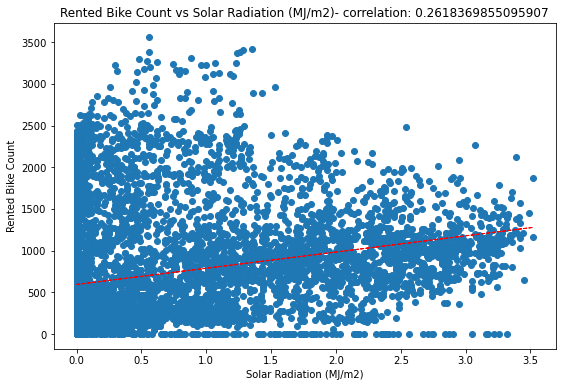

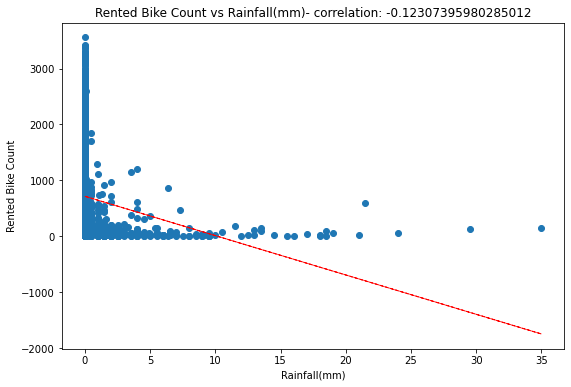

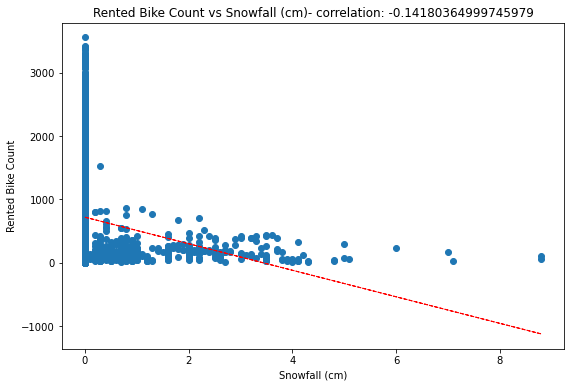

In [238]:
# Checking for linearity with dependent variable

for col in num_feature.loc[:,num_feature.columns !='Rented Bike Count']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

<AxesSubplot:>

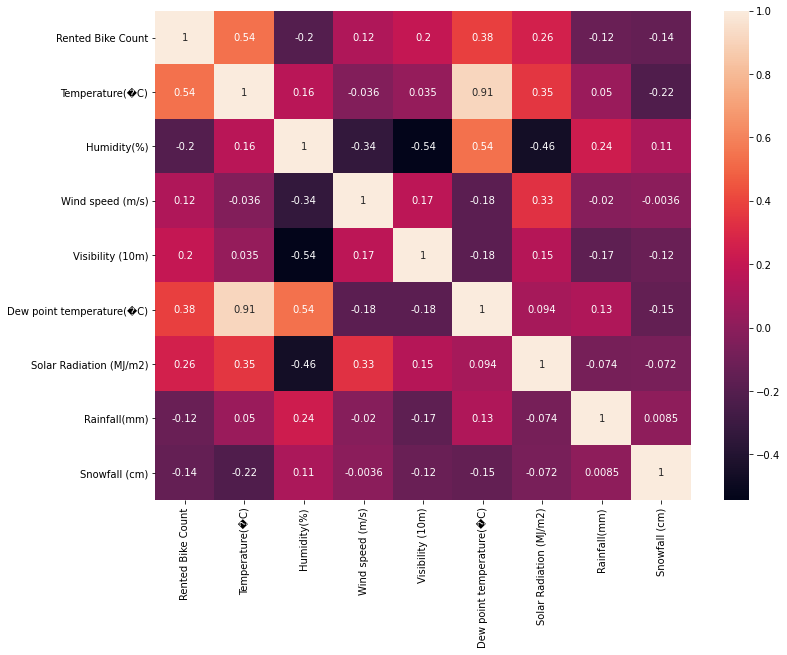

In [239]:
# Plotting Coorelation HeatMap
plt.subplots(figsize=(12, 9))
sns.heatmap(num_feature.corr(), annot = True)

To know how much each variable will contribute to the result of model training, we shall remove every hint of multicollinearity. Since, variables 'Temperature' and  'Dew Point Temperature' are positively related, we shall keep only one of them.

In [280]:
# Removing Multicollinearity by dropping 'Dew Point Temperature' column
df= df.drop(['Dew point temperature(�C)'],axis =1)

In [281]:
df.head()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekday_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


# EDA

## 1) Displaying top 10 data of Peak Bike Demand

In [290]:
# Displaying top 10 days when Bike Sharing Demand was mximum
top_10_days = df.sort_values(by='Rented Bike Count', ascending = False).head(10)
top_10_days


,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekday_weekend
4818,3556,18,24.1,57,2.9,1301,0.56,0.0,0.0,Summer,No Holiday,Yes,6,0
4866,3418,18,27.8,43,3.0,1933,1.35,0.0,0.0,Summer,No Holiday,Yes,6,0
4650,3404,18,24.9,53,3.6,2000,1.28,0.0,0.0,Summer,No Holiday,Yes,12,0
4842,3384,18,27.0,55,3.1,1246,1.26,0.0,0.0,Summer,No Holiday,Yes,6,0
4458,3380,18,24.4,48,1.9,1998,0.56,0.0,0.0,Summer,No Holiday,Yes,4,0
4890,3365,18,29.3,27,3.4,1977,1.24,0.0,0.0,Summer,No Holiday,Yes,6,0
4554,3309,18,26.2,54,2.2,1183,0.88,0.0,0.0,Summer,No Holiday,Yes,8,0
6810,3298,18,25.9,42,1.1,2000,0.48,0.0,0.0,Autumn,No Holiday,Yes,10,0
6978,3277,18,25.3,56,2.8,1992,0.54,0.0,0.0,Autumn,No Holiday,Yes,9,0
6858,3256,18,27.0,44,1.4,2000,0.62,0.0,0.0,Autumn,No Holiday,Yes,12,1


## 2) Checking if Seasons have any impact on Bike Sharing Demand ??

In [327]:
# Seasonal Wise Bike Sharing Demand

seasonal_affect = pd.DataFrame(df.groupby('Seasons',as_index = False)['Rented Bike Count'].sum())

seasonal_affect

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

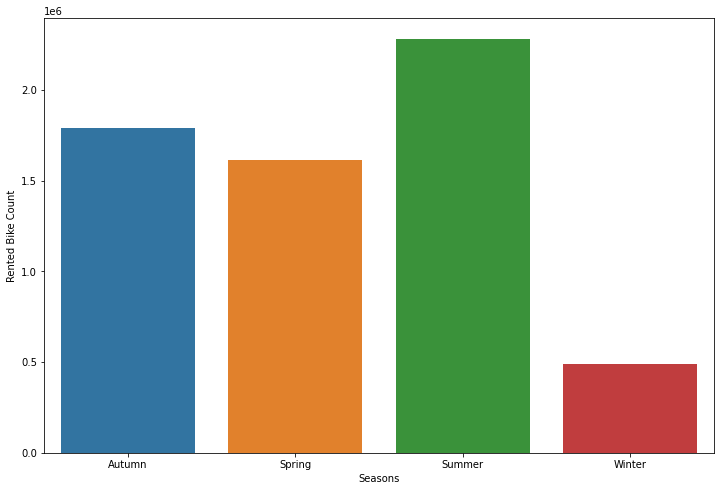

In [328]:
plt.figure(figsize = (12,8))
sns.barplot(x='Seasons', y='Rented Bike Count', data = seasonal_affect)

In [439]:
month_vs_season = df[['Seasons','month']]

<AxesSubplot:xlabel='month', ylabel='count'>

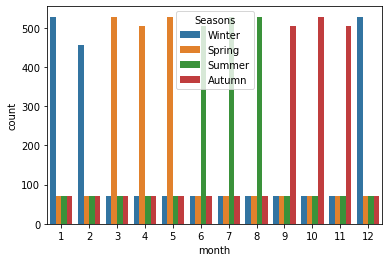

In [443]:
sns.countplot(x="month", hue="Seasons", data=month_vs_season)

Well, Seasons do make impact in Bike demand. Summer season has the maximum share of demand , while Winter has lowest. 

## 3) Checking Which time slot has the most Bike Sharing demand ??

In [334]:
hourly_affect = df.groupby('Hour' , as_index = False)['Rented Bike Count'].sum()
hourly_affect

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396
5,5,50765
6,6,104961
7,7,221192
8,8,370731
9,9,235784


<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

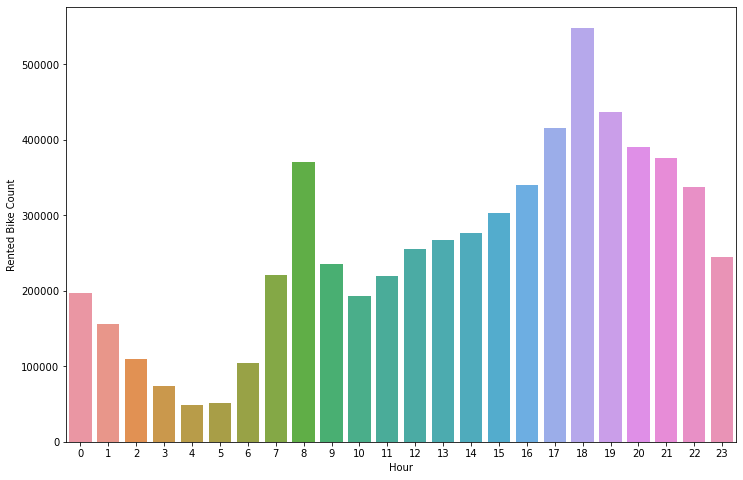

In [330]:
plt.figure(figsize = (12,8))
sns.barplot(x='Hour', y='Rented Bike Count', data = hourly_affect)

At Evening 6pm , demand goes Maximum. Morning between 7am to 8 am and in evening between 5pm to 7pm are high demand time slots

## 4) Affect Of Weekday and Weekend !

In [340]:
weekend_affect = df.groupby('weekday_weekend', as_index = False)['Rented Bike Count'].sum()

<AxesSubplot:xlabel='weekday_weekend', ylabel='Rented Bike Count'>

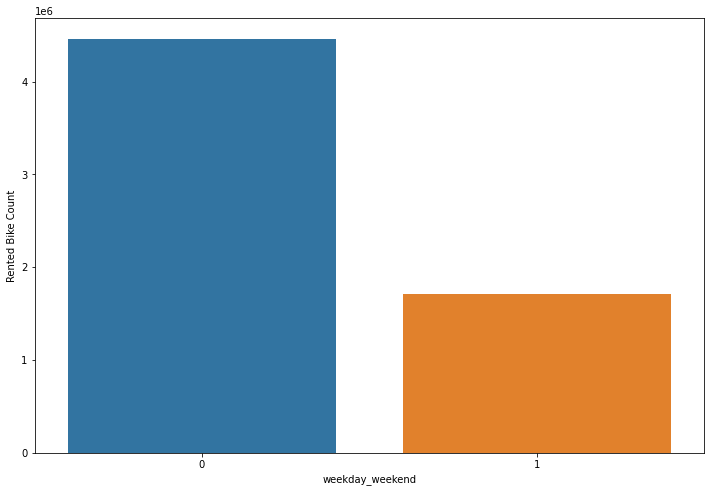

In [344]:
plt.figure(figsize=(12,8))
sns.barplot(x= 'weekday_weekend' , y='Rented Bike Count', data= weekend_affect)

Bike sharing demand is more than double on Weekdays than on Weekends.

In [337]:
# Performing onehot encoder
one_hot_encoded_data = pd.get_dummies(df, columns = ['Seasons', 'Holiday','Functioning Day'])
one_hot_encoded_data.head()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekday_weekend,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,0,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,0,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,0,0,0,0,1,0,1,0,1


In [ ]:
df = df.drop('Date',axis =1)

In [ ]:
df.head()